In [1]:
import pandas as pd
import numpy as np
import pickle
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from csv import reader, writer
from datetime import datetime as dt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import statsmodels.api as sm
import statsmodels.formula.api as smf 

In [3]:
os.chdir('data')

In [4]:
with open('dummydf.pickle','rb') as read_file:
    dummy_df = pickle.load(read_file)

In [5]:
dummy_df = pd.concat([dummy_df, pd.get_dummies(dummy_df['month'],prefix='month', drop_first=True)], axis=1)
dummy_df = dummy_df.drop('month',axis=1)

In [6]:
dummy_df

,dep_delay,weekday,weekend,hour,carrier_AS,carrier_B6,carrier_DL,carrier_F9,carrier_HA,carrier_OO,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0.0,7,1,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,7,1,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,27.0,7,1,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,19.0,7,1,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0.0,7,1,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846798,36.0,7,1,21,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2846799,1.0,7,1,23,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2846804,0.0,7,1,17,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2846810,0.0,7,1,18,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Train Test Split

In [7]:
X, y = dummy_df.drop(['dep_delay','weekday'],axis=1), dummy_df['dep_delay']
#Split the data 60 - 20 - 20 train/val/test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

# Regression Modeling

In [8]:
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()

results.summary()

/Users/KC/miniconda3/envs/metis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              dep_delay   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     163.9
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        21:06:37   Log-Likelihood:            -1.4061e+06
No. Observations:              278541   AIC:                         2.812e+06
Df Residuals:                  278512   BIC:                         2.813e+06
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.2346      0.407     10.402      0.000       3.437       5.032
weekend                   -2.3443      0.155    -15.172      0.000      -2.647      -2.041
hour                       0.5878      0.013     44.280      0.000       0.562       0.614
carrier_AS                -2.3081      0.298     -7.744      0.000      -2.892      -1.724
carrier_B6                 3.0265      0.446      6.790      0.000       2.153       3.900
carrier_DL                -1.2241      0.282     -4.342      0.000      -1.777      -0.672
carrier_F9                15.1656      0.869     17.454      0.000      13.463      16.869
carrier_HA                 2.9754      0.803      3.707      0.000       1.402       4.549
carrier_OO                -0.3721      0.263     -1.416      0.157      -0.887       0.143
carrier_UA                -1.6916      0.258     -6.552      0.000      -2.198      -1.186
carrier_WN                 2.5484      0.258      9.859      0.000       2.042       3.055
origin_SFO                 3.6350      0.163     22.368      0.000       3.316       3.953
origin_SJC                -2.4919      0.237    -10.535      0.000      -2.956      -2.028
weekday_name_Monday       -2.3123      0.261     -8.856      0.000      -2.824      -1.801
weekday_name_Saturday     -1.9563      0.162    -12.097      0.000      -2.273      -1.639
weekday_name_Sunday       -0.3880      0.156     -2.492      0.013      -0.693      -0.083
weekday_name_Thursday     -0.3413      0.263     -1.297      0.195      -0.857       0.175
weekday_name_Tuesday      -3.6840      0.266    -13.866      0.000      -4.205      -3.163
weekday_name_Wednesday    -3.0918      0.264    -11.718      0.000      -3.609      -2.575
month_2                   -0.6187      0.395     -1.565      0.118      -1.393       0.156
month_3                    3.9354      0.383     10.267      0.000       3.184       4.687
month_4                    1.2557      0.374      3.355      0.001       0.522       1.989
month_5                    2.7710      0.371      7.463      0.000       2.043       3.499
month_6                    2.0742      0.370      5.602      0.000       1.348       2.800
month_7                    2.0245      0.368      5.503      0.000       1.303       2.745
month_8                    5.7915      0.368     15.759      0.000       5.071       6.512
month_9                   -2.2840      0.376     -6.074      0.000      -3.021      -1.547
month_10                  -0.0123      0.372     -0.033      0.974      -0.741       0.717
month_11                   2.3274      0.377      6.175      0.000       1.589       3.066
month_12                   2.2685      0.328      6.918      0.000       1.626       2.911
==============================================================================
O

In [ ]:
# p val are significant = interpretable, which is good
# try time series b/c of very low R2
# MSE, R2, Adj R2 are key things to watch in our modeling
# to make dist more normal, consider taking log

# Regularization

## Lasso

In [9]:
#Lasso
X_train.columns

Index(['weekend', 'hour', 'carrier_AS', 'carrier_B6', 'carrier_DL',
       'carrier_F9', 'carrier_HA', 'carrier_OO', 'carrier_UA', 'carrier_WN',
       'origin_SFO', 'origin_SJC', 'weekday_name_Monday',
       'weekday_name_Saturday', 'weekday_name_Sunday', 'weekday_name_Thursday',
       'weekday_name_Tuesday', 'weekday_name_Wednesday', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12'],
      dtype='object')

In [10]:
lasso_model = Lasso(alpha = .01) # higher the alpha value, more restriction on the coefficients; 
#low alpha -> more generalization
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_pred_lasso = lasso_model.predict(X_val)
print(r2_score(y_val, y_pred_lasso))

In [11]:
list(zip(X_train, lasso_model.coef_))

[('weekend', -2.428834341118284),
 ('hour', 0.5858430473224513),
 ('carrier_AS', -2.1633762253225717),
 ('carrier_B6', 2.712835194824079),
 ('carrier_DL', -1.124968142272792),
 ('carrier_F9', 13.718299830092754),
 ('carrier_HA', 1.7647064298562334),
 ('carrier_OO', -0.31187471408484524),
 ('carrier_UA', -1.6048837082168574),
 ('carrier_WN', 2.4576954617665647),
 ('origin_SFO', 3.5790649633074954),
 ('origin_SJC', -2.3427878178235257),
 ('weekday_name_Monday', -1.955017062380144),
 ('weekday_name_Saturday', -1.4816950139386753),
 ('weekday_name_Sunday', 0.0),
 ('weekday_name_Thursday', -0.0),
 ('weekday_name_Tuesday', -3.3261002298835374),
 ('weekday_name_Wednesday', -2.7331204323950162),
 ('month_2', -1.1880504945700014),
 ('month_3', 3.070046943747255),
 ('month_4', 0.3778283761751423),
 ('month_5', 1.896127253872606),
 ('month_6', 1.2118200597380158),
 ('month_7', 1.1550954830307545),
 ('month_8', 4.934359711574183),
 ('month_9', -2.9012839509208903),
 ('month_10', -0.639983854857294

## Ridge

In [12]:
#Ridge
lr_model_ridge = Ridge(alpha = .01)
lr_model_ridge.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
y_pred_ridge = lr_model_ridge.predict(X_val)
print(r2_score(y_val,y_pred_ridge))

In [13]:
list(zip(X_train, lr_model_ridge.coef_))

[('weekend', -2.3443057459869556),
 ('hour', 0.587762364916767),
 ('carrier_AS', -2.308131759780527),
 ('carrier_B6', 3.0264926503102516),
 ('carrier_DL', -1.224128090589489),
 ('carrier_F9', 15.16554319771533),
 ('carrier_HA', 2.9753531992363222),
 ('carrier_OO', -0.3721473025108054),
 ('carrier_UA', -1.6915756714249417),
 ('carrier_WN', 2.5483480061180575),
 ('origin_SFO', 3.6349602549953692),
 ('origin_SJC', -2.491918516660877),
 ('weekday_name_Monday', -2.312248735663851),
 ('weekday_name_Saturday', -1.9562964877369375),
 ('weekday_name_Sunday', -0.38800995028177854),
 ('weekday_name_Thursday', -0.3413072870291116),
 ('weekday_name_Tuesday', -3.6840444703848734),
 ('weekday_name_Wednesday', -3.0918024852484156),
 ('month_2', -0.6186990330237827),
 ('month_3', 3.9353568105746413),
 ('month_4', 1.2557341614670157),
 ('month_5', 2.7709997797831973),
 ('month_6', 2.074154803837386),
 ('month_7', 2.024464123517799),
 ('month_8', 5.791449748810789),
 ('month_9', -2.2840537927073687),
 ('

# Train Set Predictions

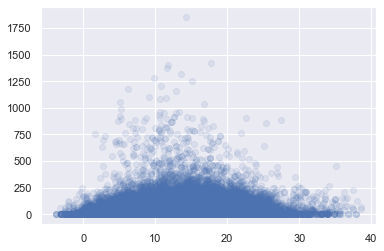

In [241]:
## predict values
# plot
plt.scatter(y_pred_ridge, y_val, alpha=.1)
plt.plot(np.linspace(0,25,40), np.linspace(0,25,40))

In [243]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

print(mae(y_val, y_pred_ridge))
print(mae(y_val,y_pred_lasso))

17.602730609362226

# Power Transform Y Train

In [14]:
from sklearn.preprocessing import power_transform
#y_reshape = y_train.reshape(-1, 1)
y_t = power_transform(y_train.values.reshape(-1,1), method='yeo-johnson')
pd.DataFrame(y_t)

,0
0,-0.726733
1,0.244729
2,-0.726733
3,-0.726733
4,1.620274
...,...
278536,0.244729
278537,1.642998
278538,1.315331
278539,-0.726733


# Scaler Transformation

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [16]:
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_tr = std.transform(X_train.values)
pd.DataFrame(X_tr)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.603772,1.460239,-0.342545,-0.181688,-0.373462,-0.084871,-0.092242,-0.459829,-0.517066,1.973535,...,-0.275410,-0.291162,-0.296712,-0.299034,3.295049,-0.304212,-0.288038,-0.294975,-0.286368,-0.429927
1,-0.603772,-1.495588,-0.342545,-0.181688,-0.373462,-0.084871,-0.092242,-0.459829,1.933990,-0.506705,...,-0.275410,-0.291162,-0.296712,-0.299034,-0.303486,-0.304212,3.471764,-0.294975,-0.286368,-0.429927
2,-0.603772,-0.202414,-0.342545,-0.181688,-0.373462,-0.084871,-0.092242,-0.459829,-0.517066,1.973535,...,-0.275410,-0.291162,3.370271,-0.299034,-0.303486,-0.304212,-0.288038,-0.294975,-0.286368,-0.429927
3,1.656254,0.351804,-0.342545,-0.181688,2.677647,-0.084871,-0.092242,-0.459829,-0.517066,-0.506705,...,-0.275410,-0.291162,-0.296712,-0.299034,-0.303486,-0.304212,3.471764,-0.294975,-0.286368,-0.429927
4,-0.603772,-0.571892,-0.342545,-0.181688,-0.373462,-0.084871,-0.092242,-0.459829,-0.517066,1.973535,...,-0.275410,-0.291162,-0.296712,-0.299034,-0.303486,-0.304212,-0.288038,-0.294975,-0.286368,-0.429927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278536,-0.603772,-0.571892,-0.342545,-0.181688,-0.373462,-0.084871,-0.092242,-0.459829,1.933990,-0.506705,...,-0.275410,-0.291162,-0.296712,-0.299034,-0.303486,-0.304212,-0.288038,3.390113,-0.286368,-0.429927
278537,-0.603772,0.167065,-0.342545,-0.181688,-0.373462,-0.084871,-0.092242,-0.459829,-0.517066,1.973535,...,-0.275410,3.434515,-0.296712,-0.299034,-0.303486,-0.304212,-0.288038,-0.294975,-0.286368,-0.429927
278538,-0.603772,-0.571892,-0.342545,-0.181688,-0.373462,-0.084871,-0.092242,-0.459829,1.933990,-0.506705,...,-0.275410,-0.291162,-0.296712,-0.299034,-0.303486,3.287185,-0.288038,-0.294975,-0.286368,-0.429927
278539,1.656254,-0.756632,-0.342545,-0.181688,-0.373462,-0.084871,-0.092242,-0.459829,1.933990,-0.506705,...,3.630947,-0.291162,-0.296712,-0.299034,-0.303486,-0.304212,-0.288038,-0.294975,-0.286368,-0.429927


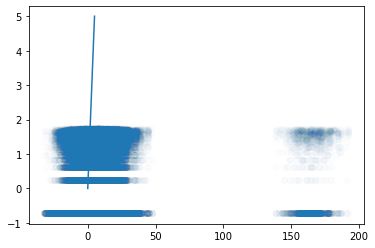

In [18]:
train_set_pred2 = lasso_model.predict(X_tr)
plt.scatter(train_set_pred2, y_t, alpha=.01)
plt.plot(np.linspace(0,5,40), np.linspace(0,5,40))

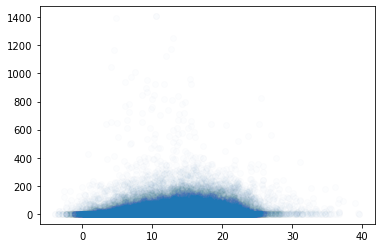

In [66]:
train_set_pred4 = lasso_model.predict(X_val)
plt.scatter(train_set_pred4, y_val, alpha=.01)
plt.plot(np.linspace(0,5,40), np.linspace(0,5,40))

# Regularization with Scaler Transform

In [19]:
## Fit a LASSO model on the standardized data

lasso_model2 = Lasso(alpha = .01)
lasso_model2.fit(X_tr,y_t)



Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
lasso_model2.resid.plot(style='o', figsize=(12,8));

AttributeError: 'Lasso' object has no attribute 'resid'

In [20]:
## Note that now we can meaningfully compare the importance of
## different features, since they're on the same scale

## But it's now difficult to interpret the coefficients
## We would need to translate back to the original feature scales by dividing
## each coefficient by the original column's standard deviation

list(zip(X_train.columns, lasso_model2.coef_))
## later in day = more delay
## WN - southwest, more delayed

[('weekend', -0.0020824170025601084),
 ('hour', 0.12024629977086058),
 ('carrier_AS', -0.0),
 ('carrier_B6', 0.0068148723725289856),
 ('carrier_DL', 0.0012996723986226084),
 ('carrier_F9', 0.023445635254109504),
 ('carrier_HA', 0.005864627062838976),
 ('carrier_OO', -0.05318425141668292),
 ('carrier_UA', -0.027318117701519352),
 ('carrier_WN', 0.12821981148691755),
 ('origin_SFO', 0.028600587994899798),
 ('origin_SJC', -0.03364624890897758),
 ('weekday_name_Monday', -0.0),
 ('weekday_name_Saturday', -0.02008843499573383),
 ('weekday_name_Sunday', -0.0),
 ('weekday_name_Thursday', 0.018249135206077842),
 ('weekday_name_Tuesday', -0.02646503298635301),
 ('weekday_name_Wednesday', -0.005815843367568856),
 ('month_2', -0.008535273471284785),
 ('month_3', 0.015842014007749722),
 ('month_4', -0.0),
 ('month_5', 0.0057341865516684735),
 ('month_6', 0.005555954449967966),
 ('month_7', 0.0),
 ('month_8', 0.02101591310284003),
 ('month_9', -0.04050322533535052),
 ('month_10', -0.0114138473135901

In [21]:
lasso_model2.intercept_
# try manually dropping other dummy variables to see how they affect delay with coeff

array([5.65166418e-17])

In [22]:
## lasso scaler r2
lasso_train_set_pred = lasso_model2.predict(X_tr)
r2_score(y_t, lasso_train_set_pred)

0.05292670135065858

In [23]:
selected_columns = ['weekend','carrier_AS',
       'carrier_B6', 'carrier_DL', 'carrier_F9', 'carrier_HA', 'carrier_OO',
       'carrier_UA', 'carrier_WN', 'origin_SFO', 'origin_SJC',
        'weekday_name_Monday', 'weekday_name_Saturday', 'weekday_name_Sunday',
        'weekday_name_Thursday', 'weekday_name_Tuesday',
       'weekday_name_Wednesday']

In [26]:
# have to use y-train, not y-t because transformed shape weird
lr_model_ridge2 = Ridge(alpha = .01)
# try with alpha = 1
lr_model_ridge2.fit(X_tr, y_train)

list(zip(X_train.loc[:,selected_columns], lr_model_ridge2.coef_))




[('weekend', -0.8307502258351626),
 ('carrier_AS', 3.1815787241566893),
 ('carrier_B6', -0.7076093082207011),
 ('carrier_DL', 0.5323083129218942),
 ('carrier_F9', -0.4012061020374391),
 ('carrier_HA', 1.2779147356385978),
 ('carrier_OO', 0.27213893318219484),
 ('carrier_UA', -0.1412546307389516),
 ('carrier_WN', -0.6901398837557553),
 ('origin_SFO', 1.0274624787325313),
 ('origin_SJC', 1.7743121317523216),
 ('weekday_name_Monday', -0.8281088528535407),
 ('weekday_name_Saturday', -0.8293876356647534),
 ('weekday_name_Sunday', -0.7975312091039889),
 ('weekday_name_Thursday', -0.299713310220996),
 ('weekday_name_Tuesday', -0.12064009666611321),
 ('weekday_name_Wednesday', -1.2836912146218893)]

In [27]:
lr_model_ridge2.intercept_

12.430227506902035

In [28]:
ridge_train_set_pred = lr_model_ridge2.predict(X_val)

In [29]:
## ridge scalar r2
r2_score(y_train, ridge_train_set_pred)

0.016206308464155494

In [30]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_train, ridge_train_set_pred)

17.59413135108736

In [31]:
# OLS with scaled features and target
model = sm.OLS(y_t,X_tr)
fit = model.fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.057
Model:                            OLS   Adj. R-squared (uncentered):              0.057
Method:                 Least Squares   F-statistic:                              578.7
Date:                Thu, 23 Jan 2020   Prob (F-statistic):                        0.00
Time:                        21:08:20   Log-Likelihood:                     -3.8708e+05
No. Observations:              278541   AIC:                                  7.742e+05
Df Residuals:                  278512   BIC:                                  7.745e+05
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.216e+10   1.87e+10      1.188      0.235   -1.44e+10    5.87e+10
x2             0.1310      0.002     70.739      0.000       0.127       0.135
x3            -0.0080      0.002     -3.400      0.001      -0.013      -0.003
x4             0.0169      0.002      8.357      0.000       0.013       0.021
x5             0.0107      0.002      4.505      0.000       0.006       0.015
x6             0.0349      0.002     18.507      0.000       0.031       0.039
x7             0.0173      0.002      9.168      0.000       0.014       0.021
x8            -0.0621      0.003    -24.162      0.000      -0.067      -0.057
x9            -0.0398      0.003    -14.671      0.000      -0.045      -0.035
x10            0.1426      0.003     53.104      0.000       0.137       0.148
x11            0.0437      0.002     21.366      0.000       0.040       0.048
x12           -0.0461      0.002    -22.778      0.000      -0.050      -0.042
x13           -0.0334      0.002    -13.844      0.000      -0.038      -0.029
x14        -1.649e+10   1.39e+10     -1.188      0.235   -4.37e+10    1.07e+10
x15        -1.756e+10   1.48e+10     -1.188      0.235   -4.65e+10    1.14e+10
x16            0.0003      0.002      0.121      0.904      -0.004       0.005
x17           -0.0600      0.002    -25.142      0.000      -0.065      -0.055
x18           -0.0399      0.002    -16.638      0.000      -0.045      -0.035
x19            0.0062      0.002      2.512      0.012       0.001       0.011
x20            0.0501      0.003     19.811      0.000       0.045       0.055
x21            0.0230      0.003      8.869      0.000       0.018       0.028
x22            0.0427      0.003     16.374      0.000       0.038       0.048
x23            0.0421      0.003     16.066      0.000       0.037       0.047
x24            0.0308      0.003     11.691      0.000       0.026       0.036
x25            0.0576      0.003     21.857      0.000       0.052       0.063
x26           -0.0226      0.003     -8.771      0.000      -0.028      -0.018
x27            0.0075      0.003      2.882      0.004       0.002       0.013
x28            0.0299      0.003     11.616      0.000       0.025       0.035
x29            0.0539      0.003     17.560      0.000       0.048       0.060
==============================================================================
Omnibus:                   194935.652   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37673.820
Skew:                           0.689   Prob(JB):                         0.00
Kurtosis:                       1.840   Cond. No.                     2.19e+13
=============================================================

## Tuning Alpha

In [ ]:
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,selected_columns].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,selected_columns].values)
    err_vec_val[i] = mae(y_val, val_set_pred)

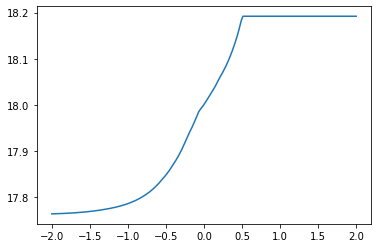

In [67]:
#plot the curve of validation error as alpha changes

plt.plot(np.log10(alphalist), err_vec_val)

In [68]:
## This is the minimum error achieved on the validation set 
## across the different alpha values we tried

np.min(err_vec_val)

17.76412949449943

In [69]:
## This is the value of alpha that gave us the lowest error
alphalist[np.argmin(err_vec_val)]

0.01

## Automated Regularization Strength Tuning via Cross-validation 

In [32]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)
std.fit(X_test.values)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)


In [34]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)


LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [35]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

0.01

# Good Coefficients to Use

In [36]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X_train.columns, lasso_model.coef_))

[('weekend', -1.1463311456182927),
 ('hour', 3.172558045445205),
 ('carrier_AS', -0.6767626002806237),
 ('carrier_B6', 0.540114747975803),
 ('carrier_DL', -0.3743508332410027),
 ('carrier_F9', 1.2501784079905558),
 ('carrier_HA', 0.2580674591229181),
 ('carrier_OO', -0.11123636980641466),
 ('carrier_UA', -0.6550389237708555),
 ('carrier_WN', 1.039699585630471),
 ('origin_SFO', 1.7589455655487283),
 ('origin_SJC', -0.8136533325191333),
 ('weekday_name_Monday', -0.7783435386873836),
 ('weekday_name_Saturday', -0.5052402446459741),
 ('weekday_name_Sunday', -0.0),
 ('weekday_name_Thursday', -0.06794725105285919),
 ('weekday_name_Tuesday', -1.2431920128592875),
 ('weekday_name_Wednesday', -1.036706723175291),
 ('month_2', -0.19179803458340364),
 ('month_3', 0.9429105293742419),
 ('month_4', 0.2678086124894208),
 ('month_5', 0.6824156929545784),
 ('month_6', 0.49956021942903944),
 ('month_7', 0.4936113445893255),
 ('month_8', 1.5388148389912644),
 ('month_9', -0.6655980528684842),
 ('month_1

In [37]:
# Make predictions on the test set using the new model
train_set_pred3 = lasso_model.predict(X_tr)
test_set_pred = lasso_model.predict(X_te)


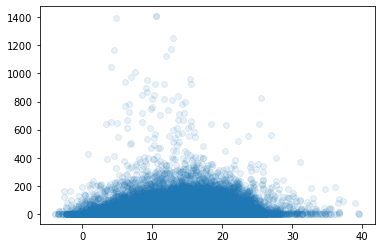

In [55]:
plt.scatter(test_set_pred, y_test, alpha=.1)
plt.plot(np.linspace(0,25,40), np.linspace(0,25,40))



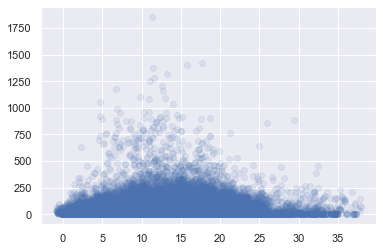

In [109]:
train_set_pred3 = lasso_model.predict(X_tr)
plt.scatter(train_set_pred3, y_train, alpha=.1)
plt.plot(np.linspace(0,25,40), np.linspace(0,25,40))


In [54]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred)

17.69006347198596

In [58]:
r2_score(y_test, test_set_pred)

0.013788093511288402

# Cross Validation KFold

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
lm_reg = Ridge(alpha=1)
cross_val_score(lm, X_train, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(lm, X_tr, y_train, cv=kf, scoring='r2')

array([0.01490037, 0.01486013, 0.016896  , 0.01548987, 0.01731697])

In [42]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')))

0.015220749106862686
0.015219696634355562


In [43]:
# develop OLS with Sklearn
#X_pred = noout_df[columns]
#y_pred = noout_df.dep_delay
lr = LinearRegression()
fit = lr.fit(X_tr,y_t)

In [44]:
fit.score(X_tr,y_t)

0.05683299798000607

# Residual Plot

Text(0, 0.5, 'residuals')

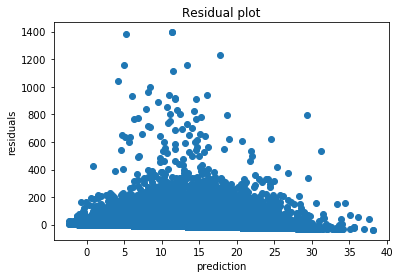

In [60]:
X_tr = std.fit_transform(X_test.values)
rgr = LinearRegression()
rgr.fit(X_te,y_test)
pred = rgr.predict(X_te)
test4_set_pred = lasso_model.predict(X_te)
res = y_test - pred
plt.scatter(pred, res)
plt.title("Residual plot")
plt.xlabel("Prediction")
plt.ylabel("Residuals")
    
    

In [64]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=.1)
lm_reg.fit(X_scaled,y)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

Ridge Regression test R^2: 0.014


In [65]:
# test predictions
lr = LinearRegression()
fit = lr.fit(X_te,y_test)
fit.score(X_te,y_test)

0.014315073614366125

# Regression Fit

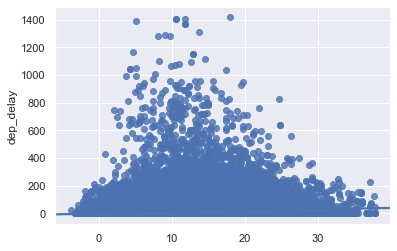

In [197]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=train_set_pred3, y=y_train)
